In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
#from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv('winequalityN.csv')
print(df.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [17]:
for col in df.columns:
  if df[col].isnull().sum() > 0:
    df[col] = df[col].fillna(df[col].mean())

df.isnull().sum()

type                   6497
fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar            0
chlorides                 0
free sulfur dioxide       0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
best quality              0
dtype: int64

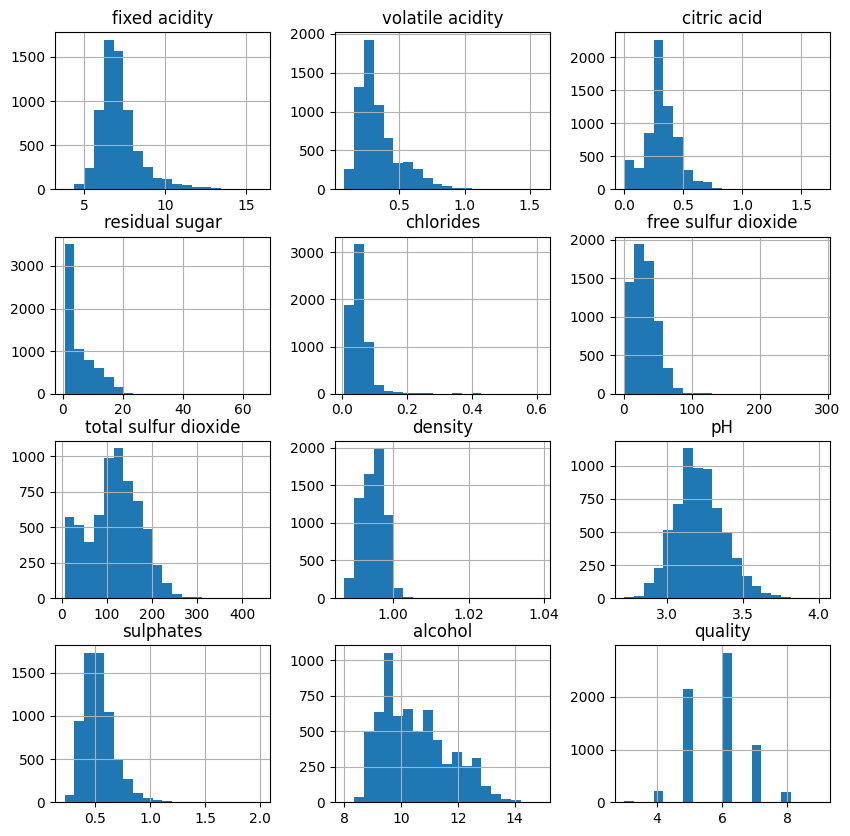

In [9]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

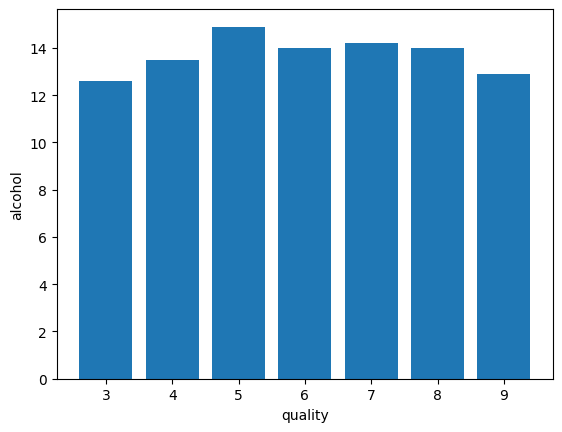

In [10]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

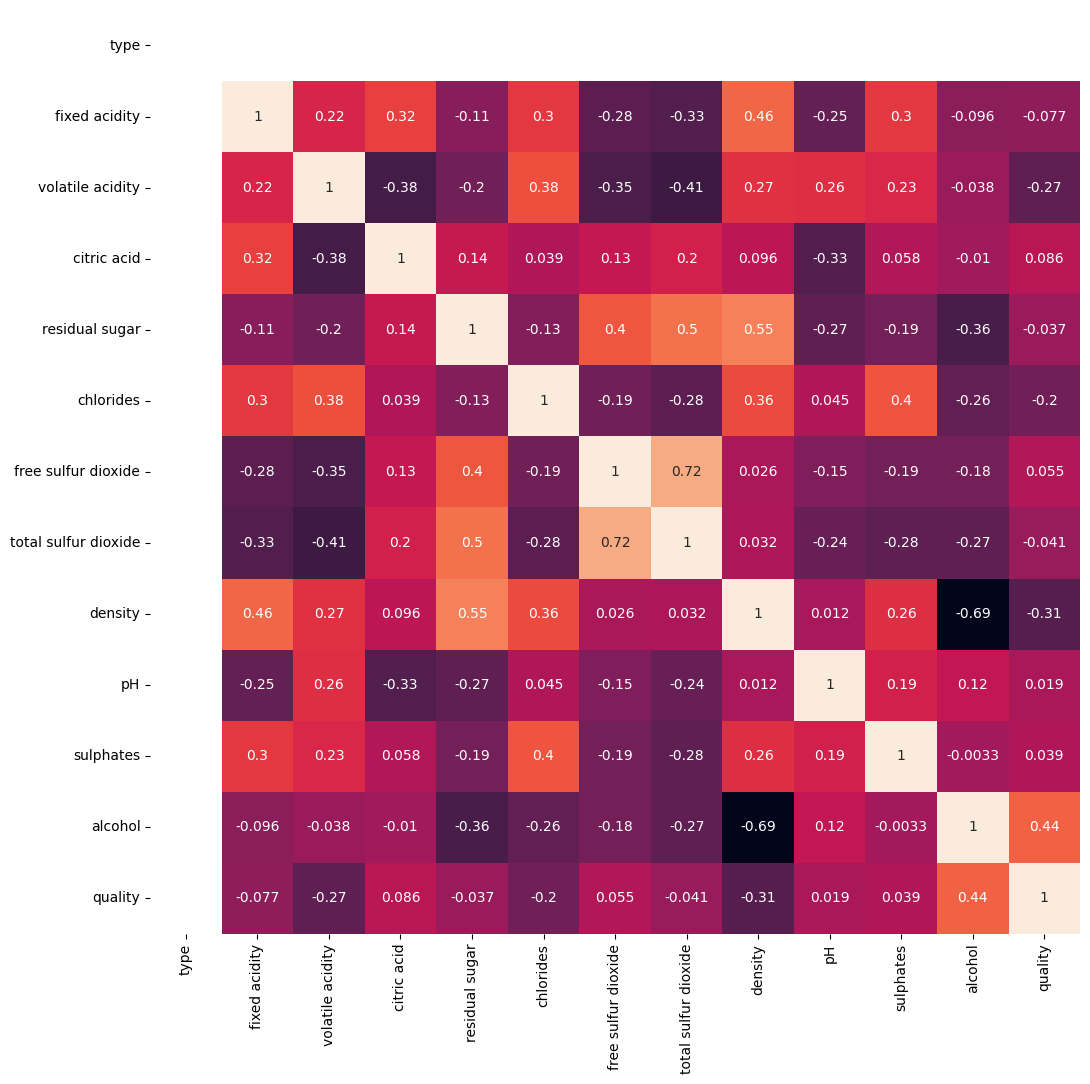

In [12]:
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, replace non-convertibles with NaN
        except:
            pass  # Skip columns that cannot be converted

plt.figure(figsize=(12, 12))
sb.heatmap(df.corr(), annot=True, cbar=False)
plt.show()


In [13]:
df = df.drop('total sulfur dioxide', axis=1)

In [14]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

In [15]:
df.replace({'white': 1, 'red': 0}, inplace=True)

In [ ]:
features = df.fillna(df.mean())
features = df.drop(['quality', 'best quality'], axis=1)
target = df['best quality']

xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.2, random_state=40)

# Impute missing values after splitting
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') 
xtrain = imputer.fit_transform(xtrain)
xtest = imputer.transform(xtest)

xtrain.shape, xtest.shape

C:\Users\Jesper Kristensen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['type']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\Jesper Kristensen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['type']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


((5197, 10), (1300, 10))

In [22]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

In [61]:
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier

models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf'), RidgeClassifier(), KNeighborsClassifier()]

for i in range(len(models)):
    models[i].fit(xtrain, ytrain)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
    print('Validation Accuracy : ', metrics.roc_auc_score(ytest, models[i].predict(xtest)))
    print()
  

LogisticRegression() : 
Training Accuracy :  0.6968344278667192
Validation Accuracy :  0.6865607216926675

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9762240429934201
Validation Accuracy :  0.8045662590288206

SVC() : 
Training Accuracy :  0.7203202525576721


LogisticRegression() : 
              precision    recall  f1-score   support

           0       0.68      0.51      0.58       474
           1       0.76      0.86      0.80       826

    accuracy                           0.73      1300
   macro avg       0.72      0.69      0.69      1300
weighted avg       0.73      0.73      0.72      1300



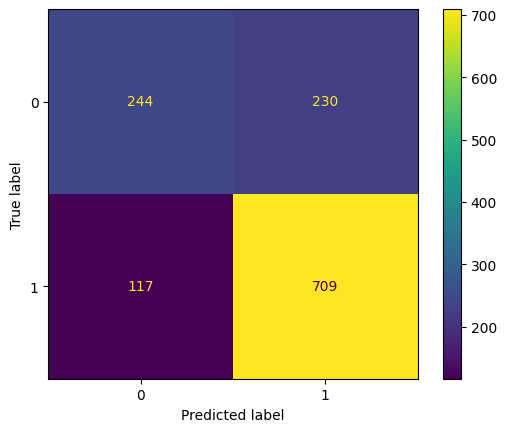

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       474
           1       0.86      0.86      0.86       826

    accuracy                           0.82      1300
   macro avg       0.

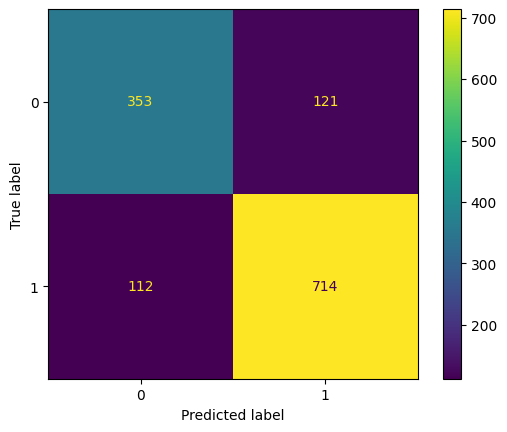

SVC() : 
              precision    recall  f1-score   support

           0       0.71      0.54      0.62       474
           1       0.77      0.87      0.82       826

    accuracy                           0.75      1300
   macro avg       0.74      0.71      0.72      1300
weighted avg       0.75      0.75      0.74      1300



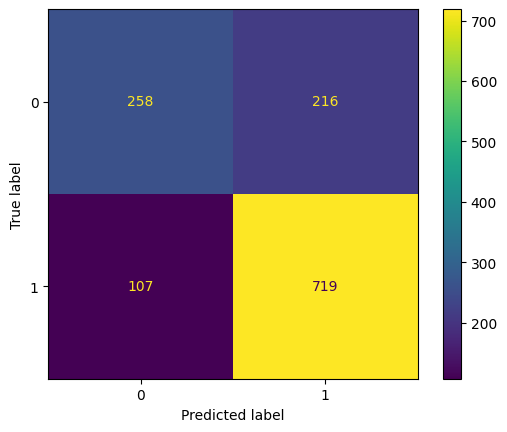

RidgeClassifier() : 
              precision    recall  f1-score   support

           0       0.69      0.50      0.58       474
           1       0.75      0.87      0.81       826

    accuracy                           0.74      1300
   macro avg       0.72      0.69      0.69      1300
weighted avg       0.73      0.74      0.72      1300



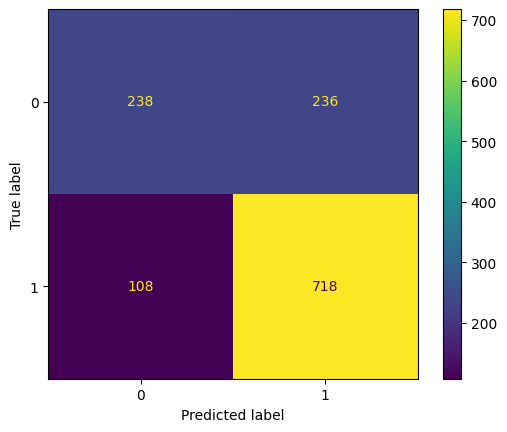

KNeighborsClassifier() : 
              precision    recall  f1-score   support

           0       0.68      0.61      0.64       474
           1       0.79      0.83      0.81       826

    accuracy                           0.75      1300
   macro avg       0.73      0.72      0.73      1300
weighted avg       0.75      0.75      0.75      1300



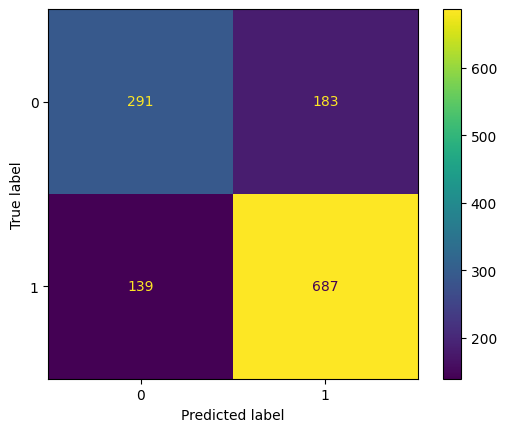

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for i in range(len(models)):
    print(f'{models[i]} : ')
    cm = confusion_matrix(ytest, models[i].predict(xtest))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models[1].classes_) 
    disp.plot()
    print(metrics.classification_report(ytest, models[i].predict(xtest)))
    plt.show()


In [63]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
xtrain_pca = pca.fit_transform(xtrain)
xtest_pca = pca.transform(xtest)

# Train and evaluate models using PCA-transformed features
models_pca = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf'), RidgeClassifier(), KNeighborsClassifier()]

for i in range(len(models_pca)):
    models_pca[i].fit(xtrain_pca, ytrain)

    print(f'{models_pca[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models_pca[i].predict(xtrain_pca)))
    print('Validation Accuracy : ', metrics.roc_auc_score(ytest, models_pca[i].predict(xtest_pca)))
    print()

LogisticRegression() : 
Training Accuracy :  0.6652475960351504
Validation Accuracy :  0.6717391526445378

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.8341837669257124
Validation Accuracy :  0.6805074529275343

SVC() : 
Training Accuracy :  0.6678617335943435
